## Análise de Playoffs vs. Temporada Regular:

- Comparar as métricas de jogadores durante a temporada regular e os playoffs para identificar aqueles que melhoram seu desempenho em momentos decisivos.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('latest_RAPTOR_by_player.csv')
df.head()

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Precious Achiuwa,achiupr01,2023,2328,1140,-2.442459,0.605968,-1.836491,1.583854,-3.756532,...,-1.771180,-0.283673,-2.054852,0.400488,0.400488,0.000000,-1.867986,-0.182806,-2.050792,-0.956065
1,Steven Adams,adamsst01,2023,2391,1133,-0.539149,4.174473,3.635324,4.196019,0.186159,...,0.416279,3.550985,3.967264,3.892111,3.892111,0.000000,0.025097,3.570024,3.595120,0.237905
2,Bam Adebayo,adebaba01,2023,6933,3448,-1.905568,2.343398,0.437830,1.584151,2.634869,...,-1.279140,2.528053,1.248914,7.035148,5.692164,1.342984,-0.809324,2.539526,1.730202,-0.443789
3,Ochai Agbaji,agbajoc01,2023,2604,1209,-1.323938,-2.198396,-3.522334,0.637793,-0.569349,...,-1.010696,-1.964927,-2.975622,-0.139469,-0.139469,0.000000,-1.145865,-2.506387,-3.652252,0.216216
4,Santi Aldama,aldamsa01,2023,3824,1783,-1.022699,-0.407462,-1.430161,-0.169196,-1.337527,...,-0.907095,-0.675487,-1.582582,1.058655,1.159520,-0.100866,-1.245487,-0.165475,-1.410962,-0.035690


In [31]:
# Primeiro, precisamos ver se há uma maneira de distinguir entre as métricas da temporada regular e dos playoffs no dataset.
# Vamos verificar se há colunas ou indicadores que façam essa distinção.

# Exibir as colunas do dataset
df.columns

Index(['player_name', 'player_id', 'season', 'poss', 'mp',
       'raptor_box_offense', 'raptor_box_defense', 'raptor_box_total',
       'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total',
       'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact'],
      dtype='object')

In [32]:
# Selecionar as colunas relevantes
playoffs_vs_regular = df[['player_name', 'war_reg_season', 'war_playoffs']]

In [33]:
# Criar uma cópia do DataFrame para evitar o alerta
playoffs_vs_regular_copy = playoffs_vs_regular.copy()

In [34]:
# Calcular a diferença de performance na cópia do DataFrame
playoffs_vs_regular_copy['war_difference'] = playoffs_vs_regular_copy['war_playoffs'] - playoffs_vs_regular_copy['war_reg_season']

In [35]:
# Ordenar os jogadores pela diferença de performance
sorted_by_difference = playoffs_vs_regular_copy.sort_values(by='war_difference', ascending=False)

In [36]:
# Exibir os 10 jogadores com a maior diferença positiva (melhoram nos playoffs)
top_improved_players = sorted_by_difference.head(10)

In [37]:
# Exibir os 10 jogadores com a maior diferença negativa (pioram nos playoffs)
top_declined_players = sorted_by_difference.tail(10)

In [38]:
def plot_war_difference(players, title):
    plt.figure(figsize=(10, 6))
    plt.barh(players['player_name'], players['war_difference'], color='skyblue')
    plt.xlabel('Diferença no WAR')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()


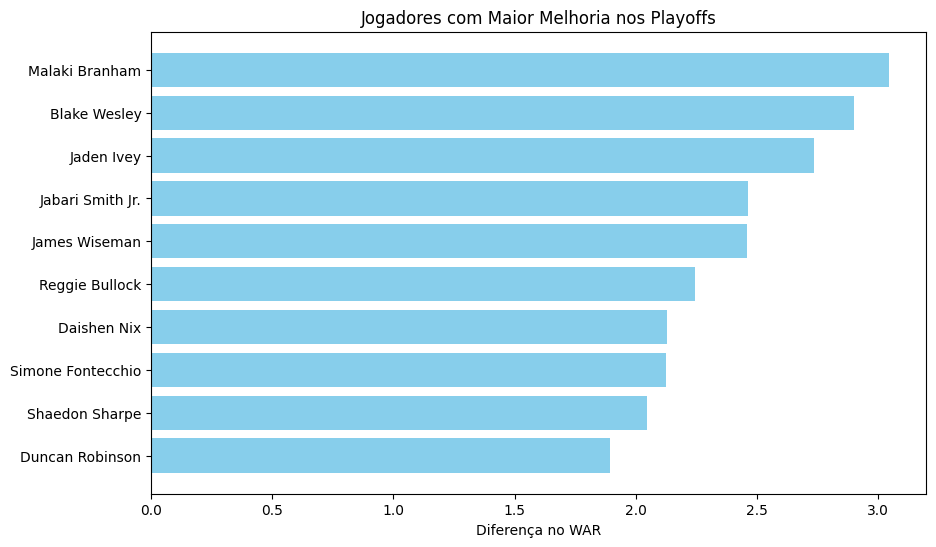

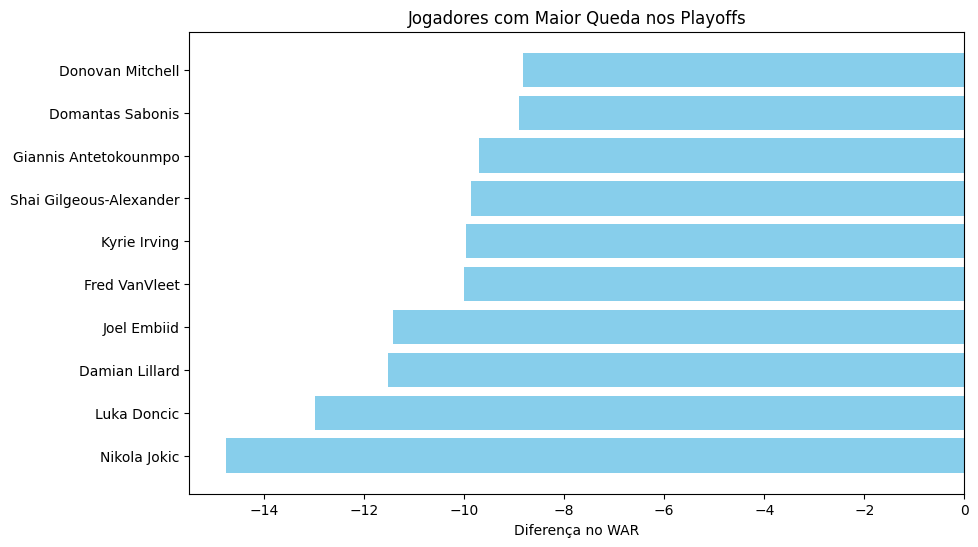

In [39]:
# gráficos para os jogadores que mais melhoraram e mais caíram nos playoffs
plot_war_difference(top_improved_players, 'Jogadores com Maior Melhoria nos Playoffs')
plot_war_difference(top_declined_players, 'Jogadores com Maior Queda nos Playoffs')

In [40]:
# Exibir as tabelas dos jogadores que mais melhoraram nos playoffs
top_improved_players

,player_name,war_reg_season,war_playoffs,war_difference
54,Malaki Branham,-3.045436,0.00000,3.045436
507,Blake Wesley,-2.898195,0.00000,2.898195
231,Jaden Ivey,-2.733839,0.00000,2.733839
454,Jabari Smith Jr.,-2.460988,0.00000,2.460988
531,James Wiseman,-2.458143,0.00000,2.458143
70,Reggie Bullock,-2.244098,0.00000,2.244098
361,Daishen Nix,-2.130140,0.00000,2.130140
147,Simone Fontecchio,-2.123400,0.00000,2.123400
441,Shaedon Sharpe,-2.047155,0.00000,2.047155
415,Duncan Robinson,-0.721100,1.17377,1.894870


In [41]:
# Exibir as tabelas dos jogadores que mais caíram nos playoffs
top_declined_players

,player_name,war_reg_season,war_playoffs,war_difference
338,Donovan Mitchell,9.445017,0.620150,-8.824867
428,Domantas Sabonis,8.658055,-0.247607,-8.905661
10,Giannis Antetokounmpo,9.313686,-0.390002,-9.703688
163,Shai Gilgeous-Alexander,9.862723,0.000000,-9.862723
229,Kyrie Irving,9.952435,0.000000,-9.952435
486,Fred VanVleet,10.010870,0.000000,-10.010870
142,Joel Embiid,12.823468,1.401212,-11.422256
292,Damian Lillard,11.521474,0.000000,-11.521474
124,Luka Doncic,12.984393,0.000000,-12.984393
249,Nikola Jokic,20.310952,5.556234,-14.754718


### Analisando desempenho por posição dos jogadores
- Adicionar informação de posição (adicionando manualmente)

- Agrupar e Analisar o desempenho

- Visualizar os Resultados

In [42]:
# Adicionando uma coluna fictícia de posições ao dataset para realizar a análise
import numpy as np
from IPython.display import display 

In [43]:
# Lista de posições fictícias
positions = ['PG', 'SG', 'SF', 'PF', 'C']

In [44]:
# Adicionar uma coluna de posição com valores aleatórios
np.random.seed(0)  # Para reprodutibilidade
df['position'] = np.random.choice(positions, size=len(df))

In [45]:
# Agrupar por posição e calcular as métricas médias adicionais
metrics_grouped_by_position = df.groupby('position').agg({
    'raptor_box_offense': 'mean',
    'raptor_box_defense': 'mean',
    'raptor_offense': 'mean',
    'raptor_defense': 'mean'
}).reset_index()

In [46]:
# Exibir as métricas agrupadas por posição
display(metrics_grouped_by_position)

,position,raptor_box_offense,raptor_box_defense,raptor_offense,raptor_defense
0,C,-1.491029,-0.451498,-1.729776,-0.281970
1,PF,-1.073525,-0.463919,-1.136408,-0.350389
2,PG,-0.447234,-0.060994,-0.648756,0.186743
3,SF,-0.703591,0.487020,-0.715089,0.522691
4,SG,-1.465663,-0.508802,-1.751000,-0.230289


In [50]:
# Função para criar gráficos de barras para as métricas de RAPTOR por posição

positions = df['position']
raptor_box_offense = df['raptor_box_offense']
raptor_box_defense = df['raptor_box_defense']
raptor_offense = df['raptor_offense']
raptor_defense = df['raptor_defense']

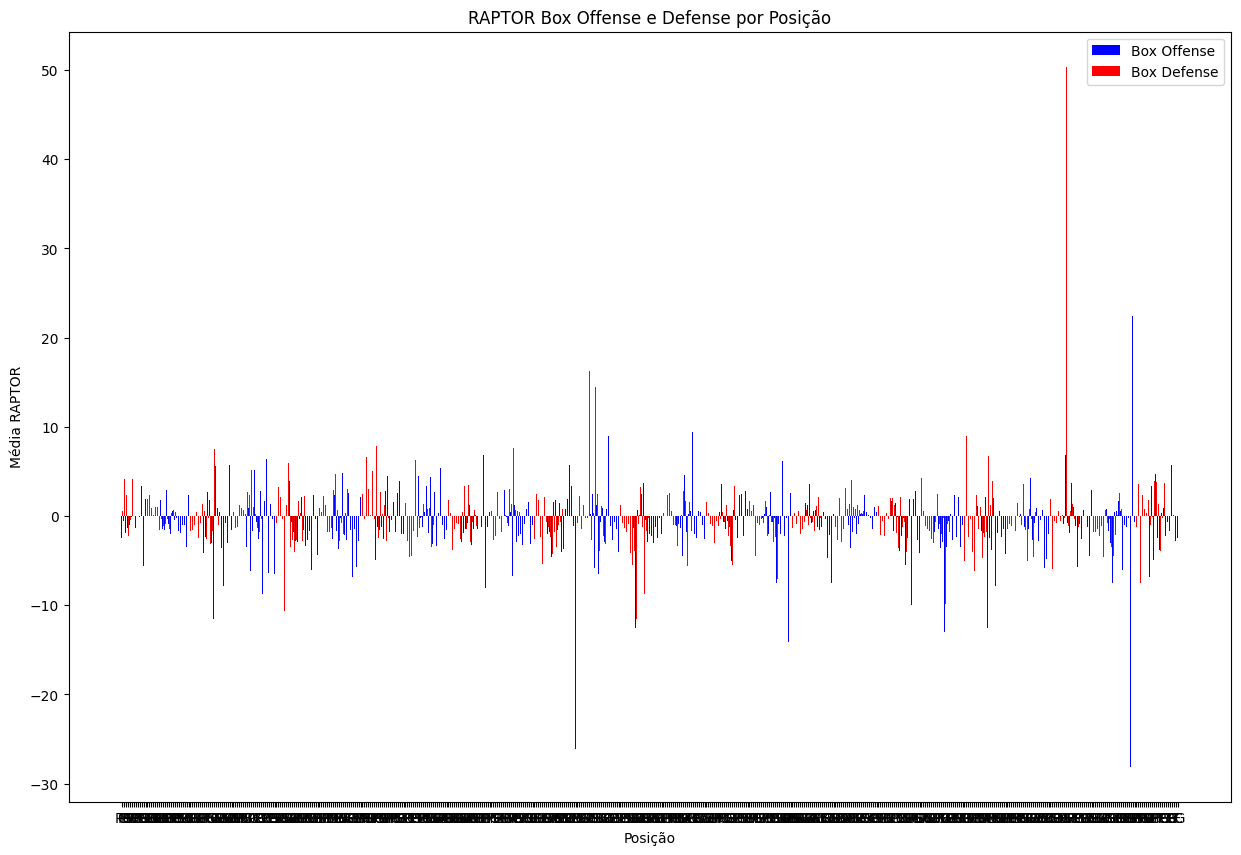

In [53]:
 # Gráfico de RAPTOR Box Offense e RAPTOR Box Defense
plt.figure(figsize=(15, 10))
bar_width = 0.35
index = np.arange(len(positions))

plt.bar(index, raptor_box_offense, bar_width, label='Box Offense', color='b')
plt.bar(index + bar_width, raptor_box_defense, bar_width, label='Box Defense', color='r')
 
plt.xlabel('Posição')
plt.ylabel('Média RAPTOR')
plt.title('RAPTOR Box Offense e Defense por Posição')
plt.xticks(index + bar_width / 2, positions)
plt.legend()
plt.show()

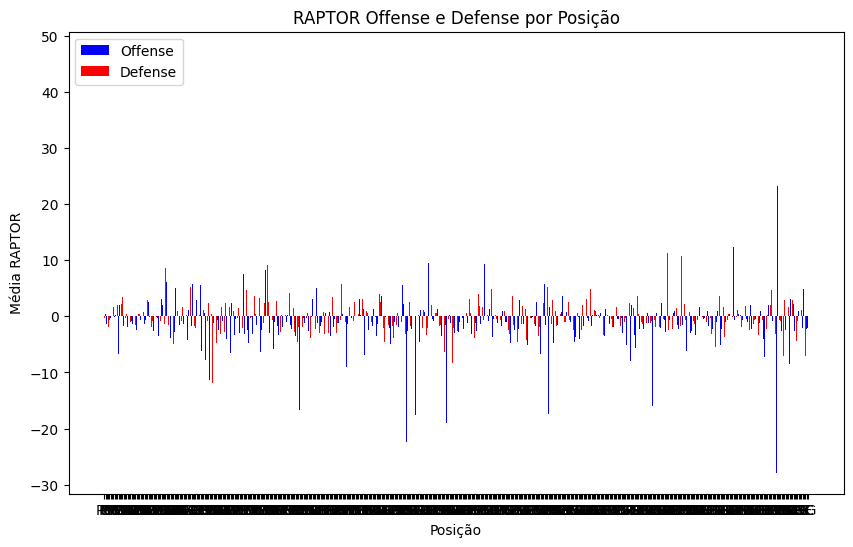

In [54]:
 # Gráfico de RAPTOR Offense e RAPTOR Defense
plt.figure(figsize=(10, 6))
plt.bar(index, raptor_offense, bar_width, label='Offense', color='b')
plt.bar(index + bar_width, raptor_defense, bar_width, label='Defense', color='r')

plt.xlabel('Posição')
plt.ylabel('Média RAPTOR')
plt.title('RAPTOR Offense e Defense por Posição')
plt.xticks(index + bar_width / 2, positions)
plt.legend()
plt.show()